In [42]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics  

In [43]:
experiment_names = ['R2192', 'R2198', 'R2217','R2336','R2337' ]
mae = []
mse = []
rmse = []
for name in experiment_names:
    experiment_name = name
    features_set = pd.DataFrame()
    coordinates_set = pd.DataFrame()
    for i in range(200, 4200, 200):
        feature_path = 'data/{}_1x{}_at{}_step200_bin100-RAW_feat.dat'.format(experiment_name, i, i//40)
        label_path = 'data/{}_1x{}_at{}_step200_bin100-RAW_pos.dat'.format(experiment_name, i, i//40)

        if(os.path.exists(feature_path)):
            features_set = pd.concat([features_set, pd.read_csv(feature_path, \
                delim_whitespace=True, header=None )],ignore_index=True,)
        if(os.path.exists(label_path)):
            coordinates_set = pd.concat([coordinates_set, pd.read_csv(label_path, \
                delim_whitespace=True,names = ['x','y'])],ignore_index=True)

    dataset = pd.concat([features_set, coordinates_set], axis=1)
    dataset.drop_duplicates(inplace=True)
    features_set = dataset.drop(['x', 'y'], axis=1)
    coordinates_set = dataset[['x', 'y']]

    features_train, features_test, coordinates_train, coordinates_test = train_test_split(features_set,coordinates_set,train_size = 0.80)
    model = RandomForestRegressor(random_state=15784) 
    model.fit(features_train, coordinates_train)
    predicted = model.predict(features_test)

    mae.append(metrics.mean_absolute_error(coordinates_test, predicted))
    mse.append(metrics.mean_squared_error(coordinates_test, predicted))
    rmse.append(np.sqrt(metrics.mean_squared_error(coordinates_test, predicted)))


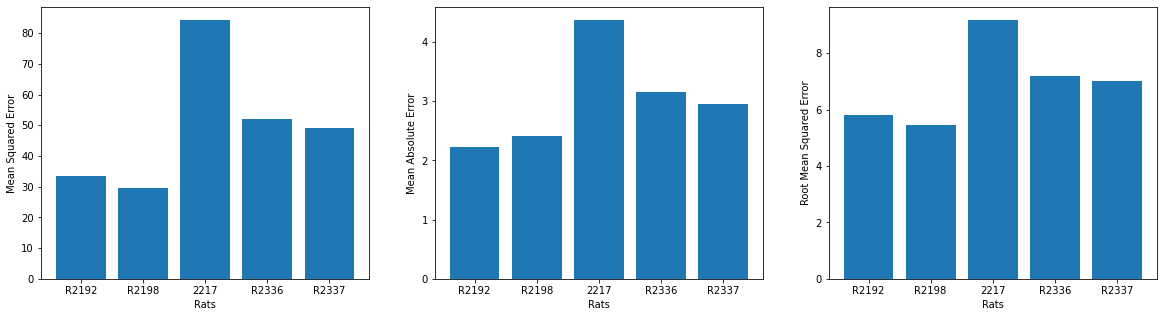

In [44]:
import matplotlib.pyplot as plt
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
rats = ['R2192', 'R2198', '2217', 'R2336', 'R2337']
plt.rcParams['figure.figsize'] = (20,5)

ax1.bar(rats,mse)
ax2.bar(rats, mae)
ax3.bar(rats, rmse)
ax1.set_xlabel('Rats')
ax1.set_ylabel('Mean Squared Error')
ax2.set_xlabel('Rats')
ax2.set_ylabel('Mean Absolute Error')
ax3.set_xlabel('Rats')
ax3.set_ylabel('Root Mean Squared Error')
plt.show()